In [1]:
# Import the Libraries
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [2]:
# Data Preprocessing
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test set data generators
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Define the batch size
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\LSUSStudent\Desktop\Data Engineering For DeepFake Detection\dataset\train",
    target_size=(150, 150),  # Input image size
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    r"C:\Users\LSUSStudent\Desktop\Data Engineering For DeepFake Detection\dataset\validation",
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\LSUSStudent\Desktop\Data Engineering For DeepFake Detection\dataset\test",
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 401 images belonging to 2 classes.
Found 148 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [3]:
# Build the Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


Epoch 1/25
12/12 [==============================] - 17s 1s/step - loss: 0.6280 - accuracy: 0.6721 - val_loss: 0.0987 - val_accuracy: 0.9688
Epoch 2/25
12/12 [==============================] - 15s 1s/step - loss: 0.2977 - accuracy: 0.8464 - val_loss: 0.0581 - val_accuracy: 0.9844
Epoch 3/25
12/12 [==============================] - 15s 1s/step - loss: 0.1239 - accuracy: 0.9702 - val_loss: 0.1321 - val_accuracy: 0.9844
Epoch 4/25
12/12 [==============================] - 14s 1s/step - loss: 0.0757 - accuracy: 0.9837 - val_loss: 0.2795 - val_accuracy: 0.9766
Epoch 5/25
12/12 [==============================] - 15s 1s/step - loss: 0.0702 - accuracy: 0.9892 - val_loss: 0.1897 - val_accuracy: 0.9766
Epoch 6/25
12/12 [==============================] - 14s 1s/step - loss: 0.0308 - accuracy: 0.9919 - val_loss: 0.1970 - val_accuracy: 0.9844
Epoch 7/25
12/12 [==============================] - 12s 961ms/step - loss: 0.0778 - accuracy: 0.9864 - val_loss: 0.2211 - val_accuracy: 0.9844
Epoch 8/25
12/12 

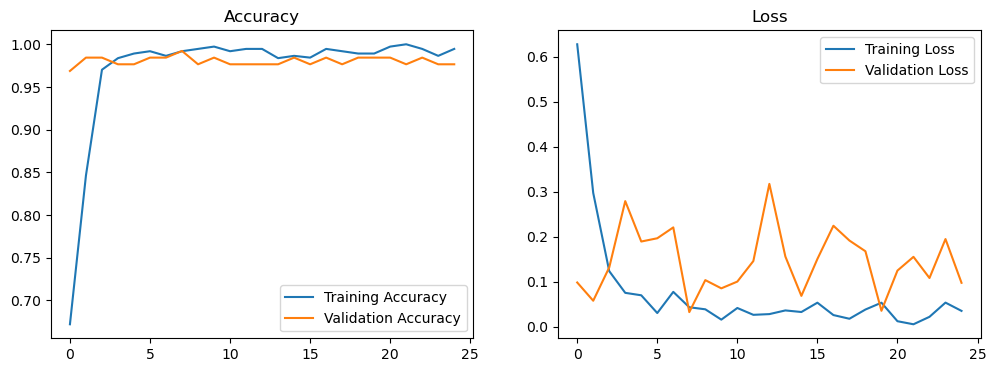

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=100,
    callbacks=[early_stopping]
)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator), verbose=0)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [5]:
# Save the trained model
model.save("image_Detection_model.keras")

# Load the saved model
loaded_model = load_model("image_Detection_model.keras")

In [6]:
# Load and preprocess a new image
new_image_path = r"C:\Users\LSUSStudent\Desktop\Data Engineering For DeepFake Detection\dataset\validation\real\PU6.jpg"
img = image.load_img(new_image_path, target_size=(150, 150))  # Load and resize the image
img_array = image.img_to_array(img)  # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size
img_array = img_array / 255.0  # Normalize the pixel values

# Make the prediction
@tf.function
def predict_fn(inputs):
    return model(inputs)

predictions = predict_fn(tf.convert_to_tensor(img_array, dtype=tf.float32))

NameError: name 'image' is not defined

In [ ]:
threshold = 0.5
if predictions < threshold:
    print("Fake Image")
else:
    print("Real Image")
